In [502]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.dpi'] = 150

In [503]:
a = 998
b = 1998
c = -999
d = -1999
h = 1 / 1000
X = 1
x = np.arange(0, X, h)
solution = np.zeros((x.size, 2))
solution[0] = np.array([1, 1])
f = lambda _u, _v: np.array([_u * a + b * _v, _u * c + d * _v])
u0 = 1
v0 = 1


def gt(x):
	alpha = (u0 + v0)
	beta = (-u0 - 2 * v0)
	u = 2 * alpha * np.exp(-x) + beta * np.exp(-1000 * x)
	v = - alpha * np.exp(-x) - beta * np.exp(-1000 * x)
	return np.array([u, v])

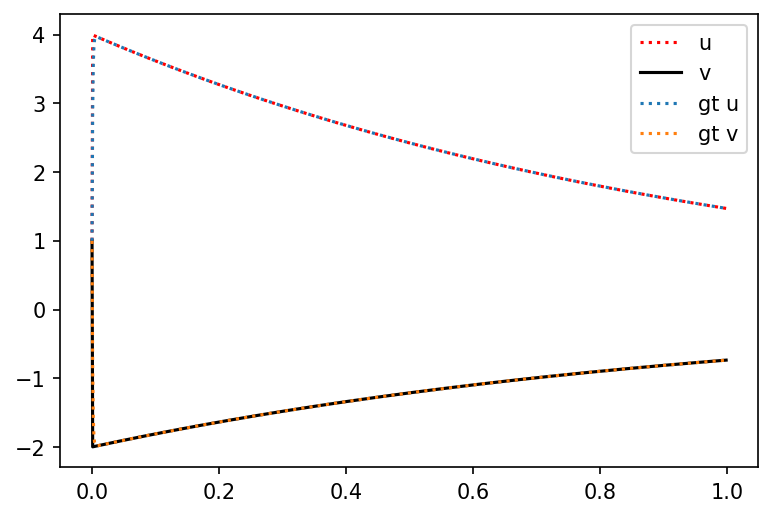

In [504]:
for i in range(x.size - 1):
	solution[i + 1] = solution[i] + h * f(*solution[i])
u = solution[:, 0]
v = solution[:, 1]
plt.plot(x, u, ':', c='r', label='u')
plt.plot(x, v, c='k', label='v')
plt.plot(x, gt(x)[0],':', label='gt u')
plt.plot(x, gt(x)[1], ':', label='gt v')

plt.legend(loc='upper right')
plt.show()

In [505]:
implicit_solution = np.zeros((x.size, 2))
implicit_solution[0] = np.array([1, 1])

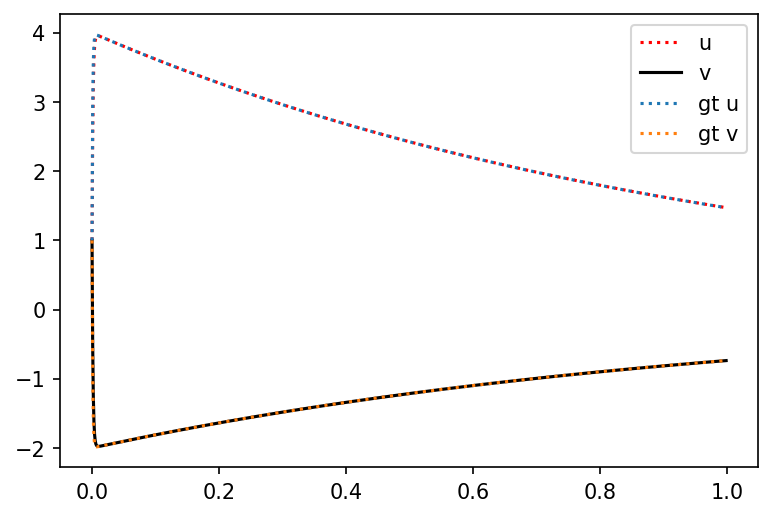

In [506]:
for i in range(x.size - 1):
	# implicit_solution[i + 1] = implicit_solution[i] + h / 2 * f(*implicit_solution[i]) + h / 2 * f(*implicit_solution[i + 1])
	J = np.array([[a, b], [c, d]])
	E = np.eye(2)
	mat = np.linalg.inv(E / h -  J)
	implicit_solution[i + 1] = implicit_solution[i] + np.dot(mat, f(*implicit_solution[i]))
implicit_u = implicit_solution[:, 0]
implicit_v = implicit_solution[:, 1]
plt.plot(x, implicit_u, ':', c='r', label='u')
plt.plot(x, implicit_v, c='k', label='v')
plt.plot(x, gt(x)[0],':', label='gt u')
plt.plot(x, gt(x)[1], ':', label='gt v')
plt.legend(loc='upper right')
plt.show()